In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("merged_players.xlsx")

In [2]:
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Supprimer les valeurs manquantes
df = df.dropna(subset=["p_goals"])
df.fillna(0, inplace=True)

# Skewness brute
skewness_raw = skew(df["p_goals"])
print(f"Skewness de p_goals : {skewness_raw:.4f}")


Skewness de p_goals : 3.5228


Si Skewness > 1 : asymétrie forte à droite → transformation recommandée.

Si 0.5 < Skewness ≤ 1 : asymétrie modérée → transformation conseillée.

Si Skewness ≤ 0.5 : pas d’action nécessaire, la variable est suffisamment symétrique.

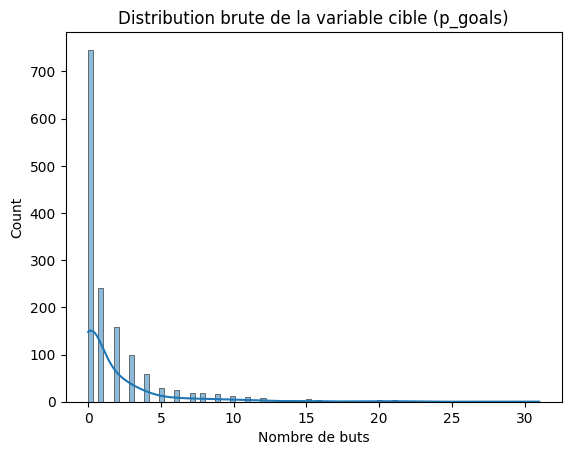

In [3]:
sns.histplot(df["p_goals"], kde=True)
plt.title("Distribution brute de la variable cible (p_goals)")
plt.xlabel("Nombre de buts")
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

# Transformation Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson")
y_trans = pt.fit_transform(df[["p_goals"]])

# Préparation des features
X = df[["expected_goals_(xg)", "vision", "striker", "shotpower"]]

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_trans, y_test_trans = train_test_split(
    X, y_trans, test_size=0.2, random_state=42
)

# Régression linéaire
model = LinearRegression()
model.fit(X_train, y_train_trans)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Prédiction
y_pred_trans = model.predict(X_test)

# Inverser les prédictions et les vraies valeurs transformées
y_pred_real = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
y_test_real = pt.inverse_transform(y_test_trans.reshape(-1, 1)).flatten()



c:\Users\bahri\Desktop\Football_performance_analysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\Users\bahri\Desktop\Football_performance_analysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [19]:
# Masque pour ne garder que les valeurs valides
mask = ~np.isnan(y_pred_real)

# Filtrage
y_pred_valid = y_pred_real[mask]
y_test_valid = y_test_real[mask]

# Calcul des métriques sur les valeurs valides uniquement
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_valid, y_pred_valid)
rmse = np.sqrt(mean_squared_error(y_test_valid, y_pred_valid))
r2 = r2_score(y_test_valid, y_pred_valid)

print(f"MAE : {mae:.4f} goals")
print(f"RMSE : {rmse:.4f} goals")
print(f"R² : {r2:.4f}")


MAE : 1.1206 goals
RMSE : 2.0597 goals
R² : 0.1958
